# Enformer's performance benchmark

###  Evaluate sequence-wise

In [319]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
outdir = "../../../../../data/FED/plots/01_enformer_benchmark"

In [2]:
head_train="human"
head_pred="human"

In [83]:
def get_evaluation(head_train,head_pred=None):
    if(head_pred is None): 
        head_pred = head_train
    datadir = "../../../../../data/FED/enformer/"+head_train+"/"+head_pred+"/pred_standard/"
    file = os.path.join(datadir,'correlation_evaluation.csv')
    evaluation= pd.read_csv(file, sep = "\t")
    evaluation = evaluation[evaluation.sequence!="sequence"]
    evaluation.pearson = pd.to_numeric(evaluation.pearson)
    evaluation["short_assay"] = evaluation.assay.str.split("/", n = 0, expand=True)[0]
    short_a = evaluation.short_assay.str.split(":", n = 0, expand=True)[0]
    def sub_labels(item):
        if(item == "DNase"):
            item = item.replace("DNase","DNase/ATAC")
        elif(item == "ATAC"):
            item = item.replace("ATAC","DNase/ATAC")
        return(item)
    short_a = list(map(sub_labels, short_a))
    evaluation["short_assay"] = short_a
    return(evaluation)

In [84]:
human_human_evaluation = get_evaluation("human")
human_human_evaluation.head()

,sequence,assay,pearson,short_assay
0,valid-0-1_197k_10_pred.pkl_0,DNase/cerebellum male adult (27 years) and mal...,0.534096,DNase/ATAC
1,valid-0-1_197k_10_pred.pkl_0,DNase/frontal cortex male adult (27 years) and...,0.662190,DNase/ATAC
2,valid-0-1_197k_10_pred.pkl_0,DNase/chorion,0.567911,DNase/ATAC
3,valid-0-1_197k_10_pred.pkl_0,DNase/Ishikawa treated with 0.02% dimethyl sul...,0.892594,DNase/ATAC
4,valid-0-1_197k_10_pred.pkl_0,DNase/GM03348,0.485094,DNase/ATAC


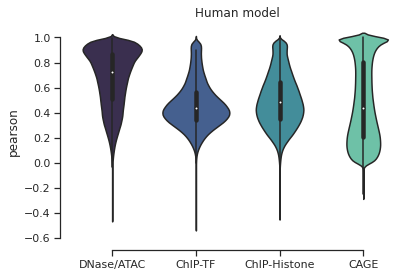

In [85]:
sns.set_theme(style="ticks", palette="pastel")
# Load the example tips dataset
p1 = sns.violinplot(x="short_assay", y="pearson",  palette="mako", data=human_human_evaluation)
sns.despine(offset=10, trim=True)
p1.set_xlabel('')
p1.set_title('Human model')
plt.savefig(os.path.join(outdir, "01_human_human_violin.pdf"))


#### Same on mouse

In [86]:
mouse_mouse_evaluation = get_evaluation("mouse")
mouse_mouse_evaluation.head()

,sequence,assay,pearson,short_assay
0,valid-1-2_197k_10_pred.pkl_0,DNase/B6D2F1;J 416B,0.919265,DNase/ATAC
1,valid-1-2_197k_10_pred.pkl_0,DNase/BALB;cAnN A20,0.926714,DNase/ATAC
2,valid-1-2_197k_10_pred.pkl_0,DNase/C57BL;6 B cell male adult (8 weeks),0.962261,DNase/ATAC
3,valid-1-2_197k_10_pred.pkl_0,DNase/C57BL;6 splenic B cell male adult (8 weeks),0.943982,DNase/ATAC
4,valid-1-2_197k_10_pred.pkl_0,DNase/C57BL;6 cerebellum male adult (8 weeks),0.905579,DNase/ATAC


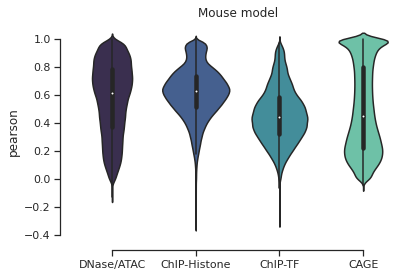

In [87]:
sns.set_theme(style="ticks", palette="pastel")
# Load the example tips dataset
p1 = sns.violinplot(x="short_assay", y="pearson",  palette="mako", data=mouse_mouse_evaluation)
sns.despine(offset=10, trim=True)
p1.set_xlabel('')
p1.set_title('Mouse model')
plt.savefig(os.path.join(outdir, "01_mouse_mouse_violin.pdf"))

# Is there a subset of sequences that performs poorly on all the assays? 

In [262]:
def get_grouped_df(subset, head):
    grouped_assays = (subset.groupby(["sequence", "short_assay"]).mean("pearson")).reset_index(["sequence", "short_assay"])
    grouped_assays_df = grouped_assays.pivot(index='sequence', columns='short_assay', values=['pearson'])
    grouped_assays_df = grouped_assays_df["pearson"]
    grouped_assays_df["specie"] = head
    return(grouped_assays_df.reset_index())

In [255]:
human_grouped_df = get_grouped_df(human_human_evaluation, "human")

short_assay,sequence,CAGE,ChIP-Histone,ChIP-TF,DNase/ATAC,specie
0,valid-0-0_197k_0_pred.pkl_0,0.332334,0.470290,0.483172,0.676881,human
1,valid-0-0_197k_0_pred.pkl_1,0.178239,0.561326,0.564017,0.922231,human
2,valid-0-0_197k_0_pred.pkl_10,0.391673,0.441610,0.469414,0.707499,human
3,valid-0-0_197k_0_pred.pkl_11,0.358469,0.442429,0.378362,0.591343,human
4,valid-0-0_197k_0_pred.pkl_12,0.339521,0.487266,0.495198,0.824064,human


In [263]:
mouse_grouped_df = get_grouped_df(mouse_mouse_evaluation, "mouse")

In [279]:
grouped_df = pd.concat([human_grouped_df, mouse_grouped_df])
grouped_df.head()

short_assay,sequence,CAGE,ChIP-Histone,ChIP-TF,DNase/ATAC,specie
0,valid-0-0_197k_0_pred.pkl_0,0.332334,0.470290,0.483172,0.676881,human
1,valid-0-0_197k_0_pred.pkl_1,0.178239,0.561326,0.564017,0.922231,human
2,valid-0-0_197k_0_pred.pkl_10,0.391673,0.441610,0.469414,0.707499,human
3,valid-0-0_197k_0_pred.pkl_11,0.358469,0.442429,0.378362,0.591343,human
4,valid-0-0_197k_0_pred.pkl_12,0.339521,0.487266,0.495198,0.824064,human


In [338]:
assays = set(grouped_df.columns[1:-1])
assay_combos = list(itertools.combinations(assays, 2))
assay_combos

[('ChIP-TF', 'DNase/ATAC'),
 ('ChIP-TF', 'ChIP-Histone'),
 ('ChIP-TF', 'CAGE'),
 ('DNase/ATAC', 'ChIP-Histone'),
 ('DNase/ATAC', 'CAGE'),
 ('ChIP-Histone', 'CAGE')]

In [342]:
assay_combos[1]

('ChIP-TF', 'ChIP-Histone')

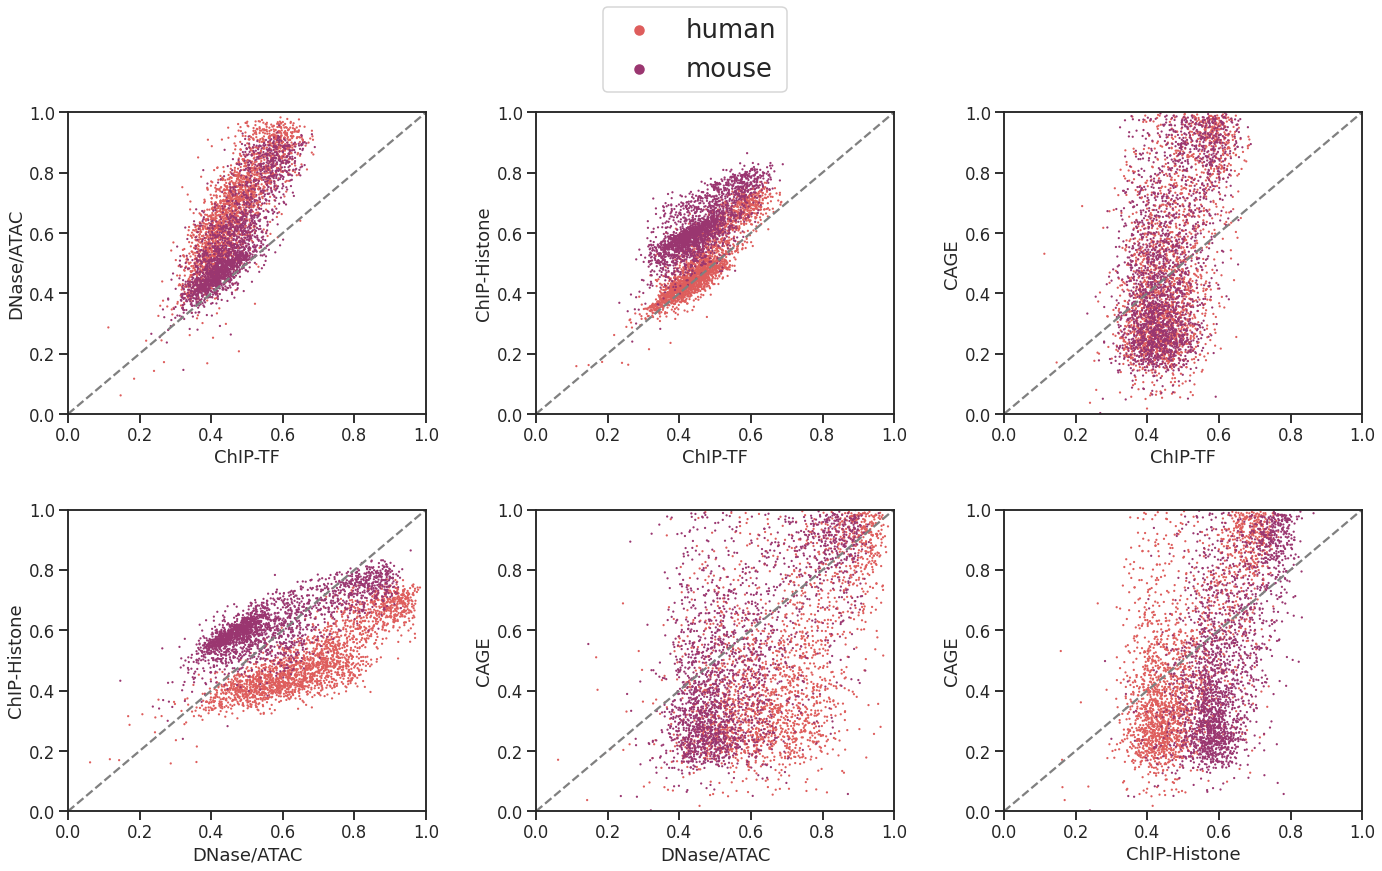

In [437]:
sns.set_theme(style="ticks", palette="pastel")
sns.set_context("talk")
fig, axes = plt.subplots(2, 3, figsize=(20,13))



def scatter_bench(x,y,i,j, legend = False):
    g = sns.scatterplot(ax=axes[i, j], data=grouped_df, x=x, y=y,\
                        hue = "specie", palette = "flare", s = 5,  linewidth=0, \
                        legend = legend)
    g.set(xlim=(0,1),ylim=(0,1))
    if(legend == True):
        g.legend(bbox_to_anchor=(0.7, 1.35), borderaxespad=0, fontsize='x-large')

    # line x = y 
    x0, x1 = g.get_xlim()
    y0, y1 = g.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.plot(lims, lims, 'grey')
    g.lines[0].set_linestyle("--")
    


assay = 0 
for i in range(0,2):
    for j in range (0,3): 
        legend = False
        if(i == 0 and j == 1): 
            legend=True
        scatter_bench(assay_combos[assay][0], assay_combos[assay][1], i,j, legend)
        assay += 1


fig.tight_layout(pad=2.0)
plt.savefig(os.path.join(outdir, "01_assays_pairs_scatter.pdf"))




In [412]:
red_patch = mpatches.Patch(color='red', label='The red data')
ax.legend(handles=[red_patch])


([<matplotlib.collections.PathCollection at 0x7fd840325c40>], ['human'])

In [ ]:
#-- OLD 

In [ ]:
file = os.path.join(outputdir,'dataset_197k_evaluation_50.h5')
with open(file, 'rb') as config_dictionary_file:
    dataset_197k_evaluation = pickle.load(config_dictionary_file)

In [ ]:
file = os.path.join(outputdir,'summarized_metrics.h5')
with open(file, 'rb') as config_dictionary_file:
    summarized_metrics = pickle.load(config_dictionary_file)

In [ ]:
# Download targets from Basenji2 dataset 
# Cite: Kelley et al Cross-species regulatory sequence activity prediction. PLoS Comput. Biol. 16, e1008050 (2020).
targets_txt = 'https://raw.githubusercontent.com/calico/basenji/master/manuscripts/cross2020/targets_human.txt'
df_targets = pd.read_csv(targets_txt, sep='\t')
df_targets

suppl = pd.ExcelFile(os.path.join(datadir, "enformer_suppl.xlsx"))
print(suppl.sheet_names)
suppl_human = suppl.parse(suppl.sheet_names[1])
suppl_mouse = suppl.parse(suppl.sheet_names[2])
suppl_human["organism"] = "human"
suppl_mouse["organism"] = "mouse"
frames = [suppl_human, suppl_mouse]
suppl_df = pd.concat(frames)


file = os.path.join(outputdir,'suppl_df.h5')
with open(file, 'wb') as config_dictionary_file:
    pickle.dump(suppl_df, config_dictionary_file)

# Plot sequences summary

In [ ]:
ordered_assays = suppl_df[suppl_df["organism"] == "human"]["assay_type"]
ordered_assays_full = suppl_df[suppl_df["organism"] == "human"]["target"]

### How many tracks per assay type? 

In [ ]:
pd.DataFrame(suppl_df[suppl_df["organism"] == "human"].groupby("assay_type").count()["index"])

In [ ]:
def get_sequence_evaluation_df(i,dataset_197k_evaluation, ordered_assays ):
    # Create dataframe for plotting
    df = pd.DataFrame()
    # Add sequence
    df["sequence"] = np.repeat(i,len(ordered_assays))
    # Add assay
    df["assay"] = ordered_assays
    df["full"] = ordered_assays_full
    # Add pearson values 
    df["pearson"] = (dataset_197k_evaluation[i]["PearsonR"])
    return(df)

In [ ]:
dataset_197k_evaluation

In [ ]:
final_df = pd.DataFrame()
for i in range(50):
    df = get_sequence_evaluation_df(i,dataset_197k_evaluation, ordered_assays)
    print(i)
    final_df = pd.concat([final_df, df])

In [ ]:
df = final_df[(final_df["assay"]  == "DNASE")]

In [ ]:
df.group

In [ ]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="assay", style="time")


In [ ]:
final_df

In [ ]:
final_df[final_df["sequence"]==1]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
sns.violinplot(x="assay", y="pearson",  palette="mako", data=final_df)

sns.despine(offset=10, trim=True)

In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
from datetime import datetime
now = datetime.now().time() # time object

print("now =", now)
print("type(now) =", type(now))

In [ ]:
final_df

In [ ]:
sns.ecdfplot(data=final_df, x="pearson")

In [ ]:
# Load previous validation dictionary
enformer_dict_file = os.path.join(outputdir,'00_enformer_dict_seqs.h5')

with open(enformer_dict_file, 'rb') as config_dictionary_file:
    human_validation_dict = pickle.load(config_dictionary_file)

In [ ]:
human_validation_dict

In [ ]:
# ------------- OLD 

### PLOT: Distributions of pearson correlation coefficients per assay 

In [ ]:
# assuming the values are in order of assay (TODO check) 
assay_list = list(suppl_df["assay_type"])
pearson_per_assay = list(metrics_human[0]["PearsonR"].numpy())
data_tuples = list(zip(assay_list,pearson_per_assay))
df_pearson_assay = pd.DataFrame(data_tuples, columns=['assay','pearson'])
df_pearson_assay["pearson"]
df = df_pearson_assay
df = df.astype({"assay": str, "pearson": float})
df

In [ ]:
df.groupby("assay").mean()

In [ ]:
df

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.violinplot(x="assay", y="pearson",  palette="mako", linewidth=1.5,
            data=df)
sns.despine(offset=10, trim=True)

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize 
g = sns.FacetGrid(df, row="assay", hue="assay", aspect=15, height=1, palette="mako")

# Draw the densities in a few steps
g.map(sns.kdeplot, "pearson",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "pearson", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "pearson")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.3)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# OLD (do not delete) - prepare  dictionary intervals

## Check if the sequences are in order

In [ ]:
df = pd.read_csv(human_sequences, memory_map=True, header=None, index_col=False, delimiter="\t")
# keep only validation intervals 
validation_intervals= df[df[3]=="valid"]
#validation_intervals = validation_intervals.head()
# create list with interval
interval_list = list()
validation_intervals.apply(lambda row : interval_list.append(kipoiseq.Interval(row[0],row[1], row[2])), axis = 1)

In [ ]:
# Create dictionary for search (can be improved! quite slow)
human_validation_dict = {}
for interval in interval_list: 
    sequence = one_hot_encode(fasta_extractor.extract(interval))
    human_validation_dict[interval] = sequence

In [ ]:
# Step 1
import pickle

enformer_dict_file = os.path.join(outputdir,'00_enformer_dict_seqs.h5')
# Step 2
with open(enformer_dict_file, 'wb') as config_dictionary_file:
    pickle.dump(human_validation_dict, config_dictionary_file)
    
# -------- read -------
with open(enformer_dict_file, 'rb') as config_dictionary_file:
    config_dictionary = pickle.load(config_dictionary_file)

print(config_dictionary)